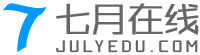


# 七月在线 《Python基础入门 第三期》 第七课 面向对象高级


> [七月在线](https://www.julyedu.com) David@2018-12-22

## 本节课程目标
### 复习上节课内容
### 类的继承和多态
### 类的魔术方法与描述符
### 类工厂函数与元类
### 模块和包
### 完成课后作业：

In [53]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

## 类的继承和多态

In [26]:
class Cinema():
    salesTotal = 0
    def __init__(self,name,location,sales):
        self.name = name
        self.location = location
        self.sales = sales
        Cinema.salesTotal += sales
    def saleTickets(self, total):
        self.sales += total
        Cinema.salesTotal += total
    @classmethod
    def getSales(cls,):
        return Cinema.salesTotal
    

cinema1 = Cinema("万达影院","万达广场",100)
cinema1.saleTickets(200)

print(Cinema.getSales())

cinema2 = Cinema("DMG影院","房山南路",50)
cinema2.saleTickets(100)
print(Cinema.getSales())


class MiniCinema(Cinema):
    def saleTickets(self, total):
        if total > 100:
            total*=0.9#九折
        super().saleTickets(total)#Python中的super().是代表调用父类中的成员。

        
minicinema1 = MiniCinema("万达迷你影院","万达广场",100)

minicinema1.saleTickets(200)
print(MiniCinema.getSales())

300
450
730.0


##### 扩展阅读：Python多继承

Python的Mixin模式可以通过多继承的方式来实现动态继承性质（在程序运行过程中，重定义类的继承顺序）。当某个模块不能修改时，通过mixin方式可以动态添加该类的方法，动态改变类的原有继承体系。

Mixin编程是一种开发模式，是一种将多个类中的功能单元的进行组合的利用的方式，这听起来就像是有类的继承机制就可以实现，然而这与传统的类继承有所不同。通常mixin并不作为任何类的基类，也不关心与什么类一起使用，而是在运行时动态的同其他零散的类一起组合使用。

使用mixin机制有如下好处：可以在不修改任何源代码的情况下，对已有类进行扩展；可以保证组件的划分；可以根据需要，使用已有的功能进行组合，来实现“新”类；很好的避免了类继承的局限性，因为新的业务需要可能就需要创建新的子类。



`__bases__`:    
返回一个元组，该元组元素是类的基类   
`__mro__`:   
返回一个元组，该元组元素是该类的继承的类，当查询继承的时候会按从左到右的顺序。

In [54]:
# 例1
MiniCinema.__base__
#返回一个元组，该元组元素是类的基类，如：

MiniCinema.__mro__
#This attribute is a tuple of classes that are considered when looking for base classes during method resolution. 
#返回一个元组，该元组元素是该类的继承的类，当查询继承的时候会按从左到右的顺序。

__main__.Cinema

(__main__.MiniCinema, __main__.Cinema, object)

In [58]:
# 例2
class a(object):
    pass

class a:
    pass
print(a.__class__)
print(a.__class__.__base__)
print(a.__base__)
# (<class 'object'>,)
# 可见a类继承了object类
# __mro__: 
# This attribute is a tuple of classes that are considered when looking for base classes during method resolution. 
# 返回一个元组，该元组元素是该类的继承的类，当查询继承的时候会按从左到右的顺序。
print(a.__class__.__mro__)
# (<class 'main.a'>, <class 'object'>)
# print(dir(a))

<class 'type'>
<class 'object'>
<class 'object'>
(<class 'type'>, <class 'object'>)


In [18]:
import types

def mixin(pyClass, pyMixinClass, key=0):
    if key:
        pyClass.__bases__ = (pyMixinClass,) + pyClass.__bases__
    elif pyMixinClass not in pyClass.__bases__:
        pyClass.__bases__ += (pyMixinClass,)
    else:
        pass
    
class testMixin:
    def test(self):
        print('In the testMixin class!')

class test1:
    def test(self):
        print('In the test1 class!')


class test0(test1):
    pass

class test2(test1, testMixin):
    def test(self):
        print('In the test2 class!')


print('------------------------------------->')        
print(test0.__mro__)  #继承了test1，object
test_0 = test0()
print('#继承了test1，object,调用test1的方法')
test_0.test()  

print('------------------------------------->')
print('before:',test0.__mro__)
test__0 = test0()
test__0.test()
mixin(test0, testMixin, 1)  
print('after:',test0.__mro__)
print('#由于优先继承了testMixin类，最靠右，所以调用testMixin类的方法')
test__0 = test0()
test__0.test()
print('------------------------------------->')

mixin(test2, testMixin)
print(test2.__mro__)

------------------------------------->
(<class '__main__.test0'>, <class '__main__.test1'>, <class 'object'>)
#继承了test1，object,调用test1的方法
In the test1 class!
------------------------------------->
before: (<class '__main__.test0'>, <class '__main__.test1'>, <class 'object'>)
In the test1 class!
after: (<class '__main__.test0'>, <class '__main__.testMixin'>, <class '__main__.test1'>, <class 'object'>)
#由于优先继承了testMixin类，最靠右，所以调用testMixin类的方法
In the testMixin class!
------------------------------------->
(<class '__main__.test2'>, <class '__main__.test1'>, <class '__main__.testMixin'>, <class 'object'>)


## 描述符descriptor与魔术方法Magic Method,`__*__`

### 描述符

描述符是一个“绑定行为”的对象属性，在描述符协议中，它可以通过方法重写属性的访问。   
这些方法有 __get__(), __set__(), 和__delete__()。   
如果这些方法中的任何一个被定义在一个对象中，这个对象就是一个描述符。

property就是数据描述符，没提供setter方法，但__set__也存在。因此高于同名成员。

In [4]:
#@property—把函数调用伪装成对属性的访问,数据描述符属性的优先级高于实例名称空间中的同名成员。
# 使用@property，不用再像java中使用getter,setter方法去设置和访问类变量   
# 这时，也只有通过@property，才能对实例变量进行访问或设置，实现了对变量访问的控制，

class Student1():
    def __init__(self,name,age):  ###__init__实例初始化
        self.name = name       ####self:实例变量，变量的名字叫name
        self.__age=age
        
    @property #getter
    def name1(self):
        return self.name
    
    @name1.setter  # setter
    def name1(self,newname):
        self.name = newname
        
    @property #getter
    def age(self):
        return 0
    
    @age.setter  # setter
    def age(self,newage):
        self.__age = newage
        
# 上面这样设置的是类变量可以被类实例随意访问，修改。
# 注意，这里的name1，如果和实例变量name重名会导致，无限递归！！！
# RecursionError: maximum recursion depth exceeded while calling a Python object

# 但如果想让@property和类实例变量同名呢？  
# 将实例变量设置为私有(像age一样)就不会导致重名引发递归死机了
s1=Student1('jack',33)
s1.name1

s1.age#getter
s1.age=22#setter

s1.age

0

### 魔术方法
- 魔法方法就是可以给你的类增加魔力的特殊方法，如果你的对象实现（重载）了这些方法中的某一个，那么这个方法就会在特殊的情况下被 Python 所调用，
- 你可以定义自己想要的行为，这些会自动发生。
- 它们经常是两个下划线包围来命名的

In [29]:
#一个最基本的魔术方法， __init__ 。

#通过此方法我们可以定义一个对象的初始操作。
#然而，当我调用 x = SomeClass() 的时候， __init__ 并不是第一个被调用的方法。
#实际上，还有一个叫做 __new__ 的方法，来构造这个实例。
#然后给在开始创建时候的初始化函数来传递参数。
#在对象生命周期的结束时，也有一个 __del__ 方法

class myclass():
    def __init__(self,):
        print('被__init__jjjhgxgfxf')

    def __del__(self,):
        print('我被__del__了，再见kjbjkh')        

c1=myclass()
del c1

被__init__jjjhgxgfxf
我被__del__了，再见kjbjkh


In [37]:
l1=[0,1,2,3,4,5,6]
l1[0:5]
len(l1)

[0, 1, 2, 3, 4]

7

In [40]:
#访问魔法函数__getitem__
class FunctionalList():

    def __init__(self, values=None):#初始化
        if values is None:
            self.values = []
        else:
            self.values = values

    def __len__(self):
        return len(self.values)+20#故意多加10个

    def __getitem__(self, key):
        if type(key)==slice:#如果传入的key是一个slice类，则这是一个切片访问
            start=key.start
            stop=key.stop+1
            if key.stop==None:
                stop=-1
            if key.start==None:
                start=0
            return self.values[start:stop]
        else:
            return str(self.values[key])*2#故意多输出2次
    

    def __setitem__(self, key, value):
        self.values[key] = str(value)+'haha'#故意都给转成str，再加haha字样

    def __delitem__(self, key):
        pass
        #del self.values[key]#就是故意不去删

    def __iter__(self):#用于迭代器，之所以列表、字典、元组等可以进行for循环，是因为类型内部定义了 __iter__
#         pass
        return iter(self.values)

    def __reversed__(self):
        return reversed(self.values)


    def append(self, value):#非魔术方法
        self.values.append(value)

l1=list(range(10))
o1=FunctionalList(l1)
len(o1)#调用的是__len__


o1[0:5]

30

[0, 1, 2, 3, 4, 5]

## 类工厂函数与元类

### 类工厂函数

In [5]:
#Namedtuple,类工厂函数
from collections import namedtuple

# 定义一个namedtuple类型User（实际是User类），并包含name，sex和age属性。
User = namedtuple('User', ['name', 'sex', 'age'])

# 创建一个User类的实例user
user = User(name='kongxx', sex='male', age=21)

# 也可以通过一个list来创建一个User对象
user = User._make(['kongxx', 'male', 21])

print(user)
# User(name='user1', sex='male', age=21)

# 获取用户的属性
print(user.name)
print(user.sex)
print(user.age)

# 修改对象属性，注意要使用"_replace"方法
user = user._replace(age=22)
print(user)
# User(name='user1', sex='male', age=21)

# 将User对象转换成字典，注意要使用"_asdict"
print (user._asdict())
# OrderedDict([('name', 'kongxx'), ('sex', 'male'), ('age', 22)])

User(name='kongxx', sex='male', age=21)
kongxx
male
21
User(name='kongxx', sex='male', age=22)
OrderedDict([('name', 'kongxx'), ('sex', 'male'), ('age', 22)])


### 元类：元类就是用来创建类的“东西”，即函数type。type就是Python在背后用来创建所有类的元类

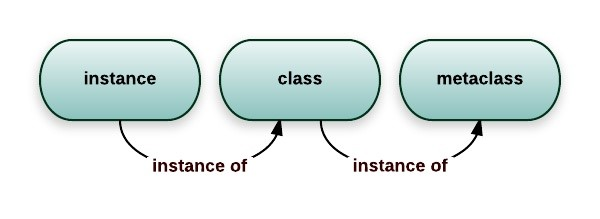

元类就是用来创建类的“东西”，即函数type。type就是Python在背后用来创建所有类的元类    
面向对象思想中的类和对象在Python中都是通过对象来实现的，没错，类也是对象。

```python
class ObjectCreator(object):
    pass
```

以上代码创建一个名为ObjectCreator的类(实际为对象)   
这个类(实际为对象)自身拥有创建对象（类实例）的能力，而这就是为什么它是一个类的原因   
但是，它的本质仍然是一个对象（类本质 上也是一个对象）   


类可以在运行时动态的创建它们,关键字class时Python在幕后就是通过元类实现   
直接写的类是固定的，而类是可以动态通过参数进行创造的

### 重提type函数

Python中所有的东西，注意，我是指所有的东西——都是对象。这包括整数、字符串、函数以及类。它们全部都是对象，而且它们都是从一个类创建而来。   
我们知道了Python中的类也是对象。元类就是用来创建这些类（对象）的，元类就是类的类，   
函数type实际上是一个元类。type就是Python在背后用来创建所有类的元类。   


内置函数type()除了查看对象所属类型外，还有种非凡的能力，即能抛开固化的类创建代码，而动态的创建类。   
而且通过type()函数创建的类和直接写class是完全一样的。   
因为解释器遇到class关键字时，扫描一下class定义的语法，最后还是调用type()函数创建出class   

In [52]:
#type()函数依次传入3个参数：
# 1.class的名称
# 2.class继承的父类集合，注意Python支持多重继承，如果只有一个父类，别忘了tuple的单元素写法；
# 3.class的方法名称与函数绑定，这里我们把函数fn绑定到方法名hello上。

MyShinyClass = type('MyShinyClass', (), {}) 
Foo = type('Foo', (), {'bar':True})
FooChild = type('FooChild', (Foo,),{}) 

s1=dict(locals())
Foo = type('Foo', (), s1)
FooChild = type('FooChild', (Foo,), s1)
FooChild.__mro__

(__main__.FooChild, __main__.Foo, object)

##### 扩展阅读：查看与指定类的元类
`__metaclass__` = ABCmeta,即指定该类的元类是ABCmeta。所谓元类就是创建类的类。

## 模块和包

##### 模块

In [46]:
A=6
A

6

##### Python中的下划线
```
_，__,__*__,
_开头，模块内的私有成员，不会被星号导入
__开头，类成员私有成员
__开头,__结尾，系统成员，不要使用
_，交互模式下，保存最后一个表达式的返回的名字
```

##### 包

- 文件夹下必须有__init__.py文件
- 路径必须可以被python搜索到```import sys;sys.path```
- 第三方安装后位于Python目录下的\Lib\site-packages

In [49]:
import numpy as np

##### pypi https://pypi.org/

## 课后作业：

### 设计类及其继承类

设计一个叫cinema的电影院的类，包含
- 类方法：
  - 初始化方法，并初始相应的类变量实例变量
 - getSales（获取全部电影院实际销售的方法）的电影院
- 实例方法：
 - saleTickets方法，要求更新实例的销售总额及类的销售总额
- 类变量：
 - 类下所有实例电影院的数量，销售额总和
- 实例变量：
 - 电影院名称，位置，销售额    
 
创建一个miniCinema迷你电影院的类，继承自cinema类
 - 重写卖票方法，大于100元的票价加入打9折扣的功能。
 - 对miniCinema实例进行调用体现多态性